Project Deliverable #2 - Data Analysis and Visualization (due 03/21/2021)

Submit a presentation with 8-10 slides with notes covering:

    Initial data exploration
    Cleaning and sampling
    Insights from data exploration and
    Machine Learning techniques proposed to be implemented


## Name: Please input your name: Vineet Bhardwaj

## UNI: Please input your UNI: VB2559

## Question 1: Decision Trees

**1.1: Load the provided dataset**

In [4]:
#!rm "listings.csv"

In [5]:
from google.colab import files
uploaded = files.upload()

Saving listings.csv to listings.csv


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import datetime

import warnings
warnings.filterwarnings("ignore")

In [8]:
'''
NYC data. 
How to gain more income from listing in NYC
What's the demand like in NYC for Airbnb properties
How to optimize reviews
'''

"\nNYC data. \nHow to gain more income from listing in NYC\nWhat's the demand like in NYC for Airbnb properties\nHow to optimize reviews\n"

In [9]:
df = pd.read_csv('listings.csv')
df.head()

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20211204143024,2021-12-05,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.33
1,3831,https://www.airbnb.com/rooms/3831,20211204143024,2021-12-05,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,4.80,4.71,4.64,NaN,f,1,1,0,0,4.86
2,5121,https://www.airbnb.com/rooms/5121,20211204143024,2021-12-05,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.52
3,5136,https://www.airbnb.com/rooms/5136,20211204143024,2021-12-05,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.02
4,5178,https://www.airbnb.com/rooms/5178,20211204143024,2021-12-05,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,4.42,4.87,4.36,NaN,f,1,0,1,0,3.68


Find empty columns

Find out fraction of missing values in each column

In [10]:
missing_value_percent = df.isnull().mean() #compute the mean of Boolean mask (True evaluates as 1 and False as 0)

In [11]:
missing_value_percent[missing_value_percent>0.4].sort_values()

neighbourhood            0.408235
neighborhood_overview    0.408261
host_about               0.421898
host_acceptance_rate     0.430703
host_response_time       0.449173
host_response_rate       0.449173
license                  0.999974
bathrooms                1.000000
calendar_updated         1.000000
dtype: float64

License, bathrooms, calendar_updated are missing huge percentages of data. These can be dropped.

Require further analysis for other columns that are missing over 40% of the data but seem important

In [12]:
(df['last_scraped'] == df['calendar_last_scraped']).mean() #way to check duplicate columns

1.0

In [13]:
df['host_has_profile_pic'].value_counts(normalize=True)

t    0.993489
f    0.006511
Name: host_has_profile_pic, dtype: float64

Exclude 'host_has_profile_pic' also because of massive data imbalance.

###Some columns are not useful, drop them. 
id=not insightful<br>
listing_url=not insightful<br>
scrape_id=not insightful<br>
name-verbose<br>
description-verbose<br>
neighborhood_overview-verbose<br>
picture_url-verbose<br>
host_id-not insightful<br>
host_url-verbose<br>
host_name-not insightful<br>
host_location-erroneous, redundant<br>
host_has_profile_pic-highly imbalanced<br>
host_about-verbose<br>
host_thumbnail_url<br>
host_picture_url<br>
host_total_listings_count-duplicate of host_listings_count<br>
latitude- not helpful<br>
longitude-not helpful<br>
neighbourhood- not informative, generic<br>
bathrooms-empty column<br>
calendar_updated-empty column<br>
calendar_last_scraped=duplicate of last_scraped<br>
license-empty column<br>




In [14]:
drop_columns=['id','listing_url','scrape_id','name','description','neighborhood_overview','picture_url','host_id','host_url','host_name',
'host_location','host_about','host_thumbnail_url','host_has_profile_pic','host_picture_url','host_total_listings_count','neighbourhood','bathrooms','latitude','longitude',
'calendar_updated','calendar_last_scraped','license']

Calculated_host_listing_count doesn't seem like a helpful column, so include it for dropping too

In [15]:
[drop_columns.append(i) for i in ['calculated_host_listings_count']] 

[None]

View the columns to drop

In [16]:
drop_columns

['id',
 'listing_url',
 'scrape_id',
 'name',
 'description',
 'neighborhood_overview',
 'picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_location',
 'host_about',
 'host_thumbnail_url',
 'host_has_profile_pic',
 'host_picture_url',
 'host_total_listings_count',
 'neighbourhood',
 'bathrooms',
 'latitude',
 'longitude',
 'calendar_updated',
 'calendar_last_scraped',
 'license',
 'calculated_host_listings_count']

In [17]:
len(drop_columns)

24

In [18]:
df.drop(columns=drop_columns,index=1,inplace=True)
df.head()

,last_scraped,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_identity_verified,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2021-12-05,2008-09-09,within a day,80%,17%,f,Midtown,8.0,"['email', 'phone', 'reviews', 'offline_governm...",t,...,4.62,4.76,4.79,4.86,4.41,f,3,0,0,0.33
2,2021-12-05,2009-02-03,within an hour,100%,100%,f,Bedford-Stuyvesant,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,...,4.09,4.91,4.91,4.47,4.52,f,0,2,0,0.52
3,2021-12-05,2009-02-03,within a day,100%,25%,f,Greenwood Heights,1.0,"['email', 'phone', 'reviews']",t,...,5.00,5.00,5.00,4.50,5.00,f,1,0,0,0.02
4,2021-12-05,2009-03-03,within a day,100%,100%,f,Hell's Kitchen,1.0,"['email', 'phone', 'facebook', 'reviews']",f,...,3.73,4.66,4.42,4.87,4.36,f,0,1,0,3.68
5,2021-12-05,2009-02-05,NaN,NaN,NaN,f,Upper West Side,1.0,"['email', 'phone', 'facebook', 'google', 'revi...",t,...,4.82,4.97,4.95,4.94,4.92,f,0,1,0,0.87


##Prep Data
Handle date columns<br>
Handle missing values<br>
Handle categorical features<br>
Handle monetary features<br>
Handle missing values<br>

###Special consideration, don't drop
*has_availability-get rid of the rows with f entry<br>
*amenities-verbose, but use the count of elements<br>
*host_verifications-too verbose, but use the count of elements<br>

In [19]:
date_cols=['last_scraped','host_since','first_review','last_review']

In [20]:
last_scraped_date = pd.to_datetime(df['last_scraped'])
today_date = pd.to_datetime(datetime.datetime.now())

Plot % of missing values in each column. Assuming we want to train a decision tree, would you consider imputing the missing values? If not, why?**

In [21]:
#use the code for hw1 for this
pct_mis=df.isnull().sum()*100/len(df)

In [22]:
pct_mis.sort_values(ascending=False,inplace=True)

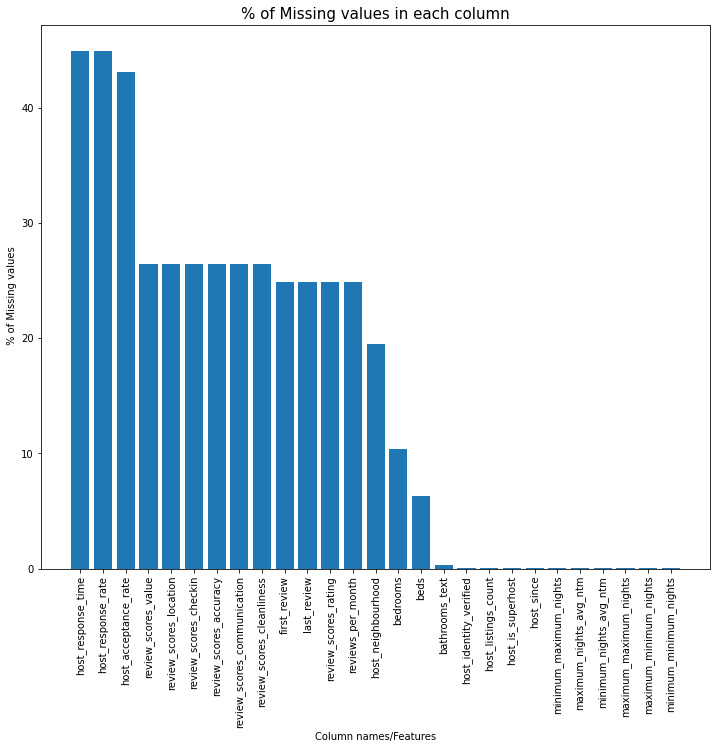

In [23]:
ax, fig = plt.subplots(figsize = (12,10))
xlabels=pct_mis[pct_mis>0].index
ylabels=pct_mis[pct_mis>0]
plt.xticks(rotation = 90)
plt.xlabel('Column names/Features')
plt.ylabel(' % of Missing values')
plt.bar(xlabels,ylabels)
plt.title('% of Missing values in each column', fontsize=15)
plt.show()

In [24]:
'''I will consider dropping the rows that contain the missing values. 
Yes, I will be imputing the missing values '''

'I will consider dropping the rows that contain the missing values. \nYes, I will be imputing the missing values '

In [25]:
print(pct_mis['last_scraped'])
print(pct_mis['first_review'])
print(pct_mis['last_review'])
print(pct_mis['host_since'])

0.0
24.830180792141288
24.830180792141288
0.08882850872609468


Missing values in 'host_since' imputed with the mode value. 
Days since the host listed their premise will be till the last scraped date.

In [26]:
df['host_since'] = df['host_since'].fillna(df['host_since'].mode()[0])
df['host_since_days'] = last_scraped_date - pd.to_datetime(df['host_since'])

In [27]:
df['host_since_days'] = df['host_since_days'].apply(lambda x: x.value/10**9/3600/24)

In [28]:
(df['host_since']).isnull().mean()

0.0

Deal with missing values of first_review by populating corresponding host_since values.

In [29]:
df['first_review'] = df['first_review'].fillna(df['host_since'])
df['time_to_first_review'] = last_scraped_date - pd.to_datetime(df['first_review'])

In [30]:
df['time_to_first_review']

0       4397 days
2       2874 days
3       2894 days
4       4127 days
5       4075 days
           ...   
38272   1874 days
38273   1874 days
38274    653 days
38275    653 days
38276   2112 days
Name: time_to_first_review, Length: 38276, dtype: timedelta64[ns]

In [31]:
df['time_to_first_review'] = df['time_to_first_review'].apply(lambda x: x.value/10**9/3600/24)

In [32]:
(df['host_since_days'] - df['time_to_first_review']).value_counts().sort_values(ascending=False)

0.0       9509
20.0        59
26.0        59
15.0        57
25.0        56
          ... 
3346.0       1
3540.0       1
3806.0       1
3600.0       1
4750.0       1
Length: 3613, dtype: int64

Handle missing values in last_review

In [33]:
df['last_review'] = df['last_review'].fillna(last_scraped_date)
df['time_from_last_review'] = last_scraped_date - pd.to_datetime(df['last_review'])

In [34]:
df['time_from_last_review'] = df['time_from_last_review'].apply(lambda x: x.value/10**9/3600/24)

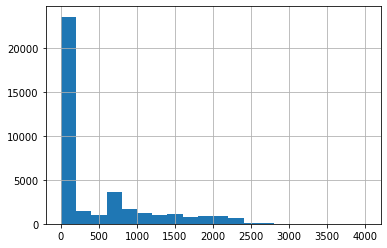

In [35]:
df['time_from_last_review'].hist(bins=20)

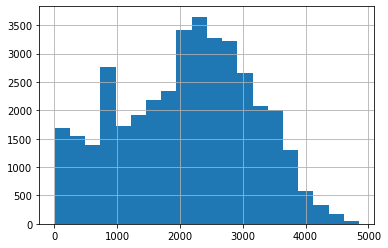

In [36]:
df['host_since_days'].hist(bins=20)

We observe an almost a normal distribution where a decent percentage of hosts have been active for between 2000 to 3000 days.

Handling Monetary features

In [37]:
for i in df['price']:
    if len(i)==0:
      i = "$0"
df['price'] = df['price'].str.replace('$','')
df['price'] = df['price'].str.replace(',','')
df['price'] = df['price'].astype(float)

In [38]:
df['price']

0        150.0
2         60.0
3        275.0
4         68.0
5         75.0
         ...  
38272     79.0
38273     76.0
38274    116.0
38275    106.0
38276    689.0
Name: price, Length: 38276, dtype: float64

Sort out Review related columns by replacing missing values with respective column means

In [39]:
review_cols=['review_scores_rating', 'review_scores_accuracy',
       'review_scores_cleanliness', 'review_scores_checkin','review_scores_communication', 'review_scores_location',
       'review_scores_value','reviews_per_month']

In [40]:
df[review_cols].isnull().sum()

review_scores_rating            9504
review_scores_accuracy         10116
review_scores_cleanliness      10105
review_scores_checkin          10123
review_scores_communication    10112
review_scores_location         10126
review_scores_value            10127
reviews_per_month               9504
dtype: int64

In [41]:
for col in review_cols:
    df[col] = df[col].fillna(df[col].mean())

In [42]:
df[review_cols].isnull().sum()

review_scores_rating           0
review_scores_accuracy         0
review_scores_cleanliness      0
review_scores_checkin          0
review_scores_communication    0
review_scores_location         0
review_scores_value            0
reviews_per_month              0
dtype: int64

Handle Categorical features

In [43]:
df.columns

Index(['last_scraped', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count', 'host_verifications',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communic

In [44]:
cat_cols=['host_response_time',
       'host_response_rate', 'host_acceptance_rate','host_is_superhost', 'host_neighbourhood',
       'host_listings_count','host_verifications', 'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed','property_type', 'room_type',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds',
       'amenities', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 
       'availability_30', 'availability_60', 'availability_90',
       'availability_365',  'number_of_reviews','number_of_reviews_ltm', 'number_of_reviews_l30d',
        'instant_bookable', 
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms', 'reviews_per_month']

In [45]:
cat_df=df[cat_cols]
cols_missing_values=[]
for col in cat_cols:
    if df[col].isnull().mean()>0:
        cols_missing_values.append(col)

In [46]:
cols_missing_values

['host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_neighbourhood',
 'host_listings_count',
 'host_identity_verified',
 'bathrooms_text',
 'bedrooms',
 'beds',
 'minimum_minimum_nights',
 'maximum_minimum_nights',
 'minimum_maximum_nights',
 'maximum_maximum_nights',
 'minimum_nights_avg_ntm',
 'maximum_nights_avg_ntm']

In [47]:
df[cols_missing_values].isnull().sum().sort_values()

minimum_minimum_nights       18
maximum_minimum_nights       18
minimum_maximum_nights       18
maximum_maximum_nights       18
minimum_nights_avg_ntm       18
maximum_nights_avg_ntm       18
host_is_superhost            34
host_listings_count          34
host_identity_verified       34
bathrooms_text              107
beds                       2405
bedrooms                   3975
host_neighbourhood         7464
host_acceptance_rate      16486
host_response_time        17193
host_response_rate        17193
dtype: int64

We will impute all the above missing values with the column modes, except for host_neighborhood, because this should influence the price significantly, and it's difficult to impute. So, we just drop those rows.

In [48]:
for col in [
            'minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
            'host_is_superhost','host_listings_count','host_identity_verified','bathrooms_text','beds','bedrooms','host_acceptance_rate',
            'host_response_time','host_response_rate']:

  df[col].fillna(df[col].mode()[0],inplace=True)

In [49]:
df[['minimum_minimum_nights','maximum_minimum_nights','minimum_maximum_nights','maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
            'host_is_superhost','host_listings_count','host_identity_verified','bathrooms_text','beds','bedrooms','host_acceptance_rate',
            'host_response_time','host_response_rate']].isnull().mean()

minimum_minimum_nights    0.0
maximum_minimum_nights    0.0
minimum_maximum_nights    0.0
maximum_maximum_nights    0.0
minimum_nights_avg_ntm    0.0
maximum_nights_avg_ntm    0.0
host_is_superhost         0.0
host_listings_count       0.0
host_identity_verified    0.0
bathrooms_text            0.0
beds                      0.0
bedrooms                  0.0
host_acceptance_rate      0.0
host_response_time        0.0
host_response_rate        0.0
dtype: float64

In [50]:
df.dropna(subset=['host_neighbourhood'],axis=0,inplace=True)

In [51]:
df.isnull().mean()

last_scraped                                    0.0
host_since                                      0.0
host_response_time                              0.0
host_response_rate                              0.0
host_acceptance_rate                            0.0
host_is_superhost                               0.0
host_neighbourhood                              0.0
host_listings_count                             0.0
host_verifications                              0.0
host_identity_verified                          0.0
neighbourhood_cleansed                          0.0
neighbourhood_group_cleansed                    0.0
property_type                                   0.0
room_type                                       0.0
accommodates                                    0.0
bathrooms_text                                  0.0
bedrooms                                        0.0
beds                                            0.0
amenities                                       0.0
price       

In [52]:
df["amenities"]

0        ["Extra pillows and blankets", "Baking sheet",...
2        ["Kitchen", "Long term stays allowed", "Wifi",...
3        ["Kitchen", "BBQ grill", "Cable TV", "Carbon m...
4        ["Room-darkening shades", "Lock on bedroom doo...
5        ["Breakfast", "Carbon monoxide alarm", "Fire e...
                               ...                        
38268    ["Hangers", "Kitchen", "Long term stays allowe...
38269    ["Cooking basics", "Security cameras on proper...
38272    ["Fire extinguisher", "Cooking basics", "Carbo...
38273    ["Fire extinguisher", "Cooking basics", "Carbo...
38276    ["Stainless steel electric stove", "Security c...
Name: amenities, Length: 30812, dtype: object

Display feature correlations

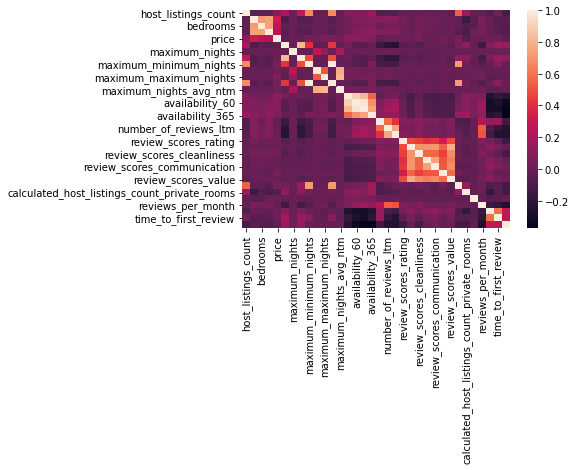

In [53]:
sns.heatmap(df.corr(),linewidths=0)

###Analyze the data

Create PLotting function first

In [54]:

def plotting_data(fig_size,xticks_rotatation,x_label,y_label,x,y,is_sorting,is_ascending):
    plt.figure(figsize=fig_size)
    plt.xticks(rotation=xticks_rotatation)
    plt.xlabel(x_label,size=12,color='r')
    plt.ylabel(y_label,size=12,color='r')
    if is_sorting:
        plt.plot(df.groupby(x).mean()[y].sort_values(ascending = is_ascending))
    else:
        plt.plot(df.groupby(x).mean()[y])

Neighbourhood_cleansed gives priciest neighbourhood of NYC on Airbnb, we use that and plot that against the price

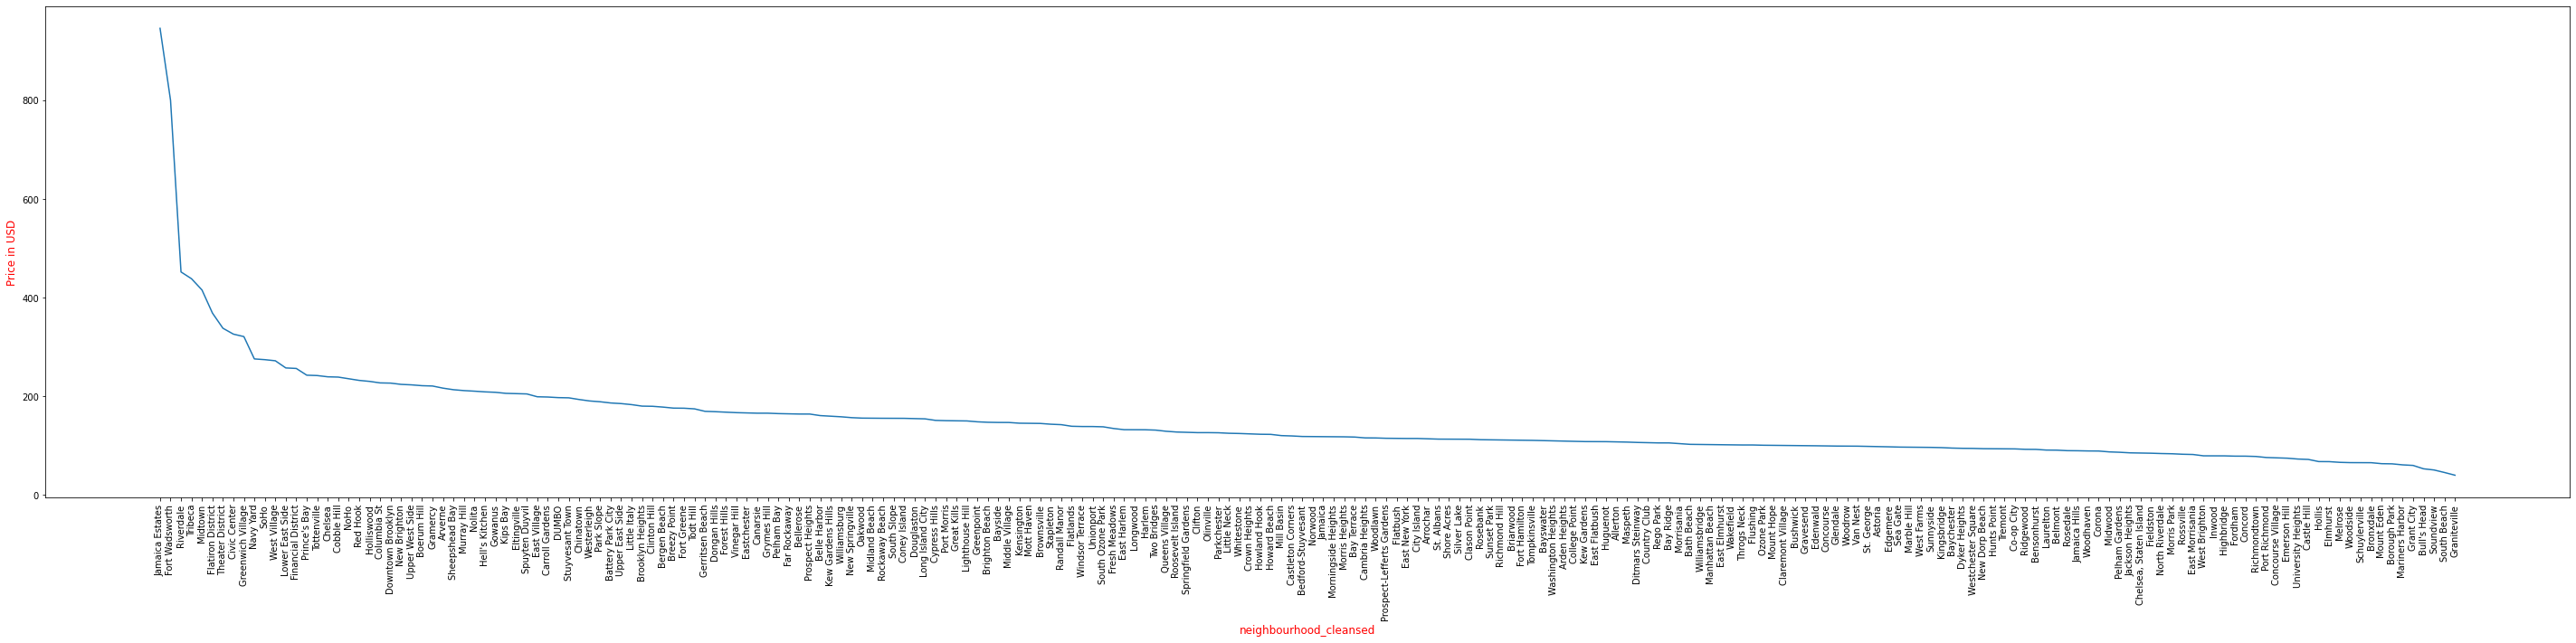

In [55]:
plotting_data(fig_size=(50,10),xticks_rotatation = 90,x_label ='neighbourhood_cleansed',y_label ="Price in USD",
              x = 'neighbourhood_cleansed',y='price',is_sorting = True,is_ascending = False)

######Jamaica Estates (Queens), Fort Wadsworth (Staten Island), and Riverdale (Bronx) are the priciest NYC neighborhoods on average on AirBNB.

###Neighbourhood_group_cleansed gives general priciest boroughs of NYC on Airbnb, we use that and plot that against the price

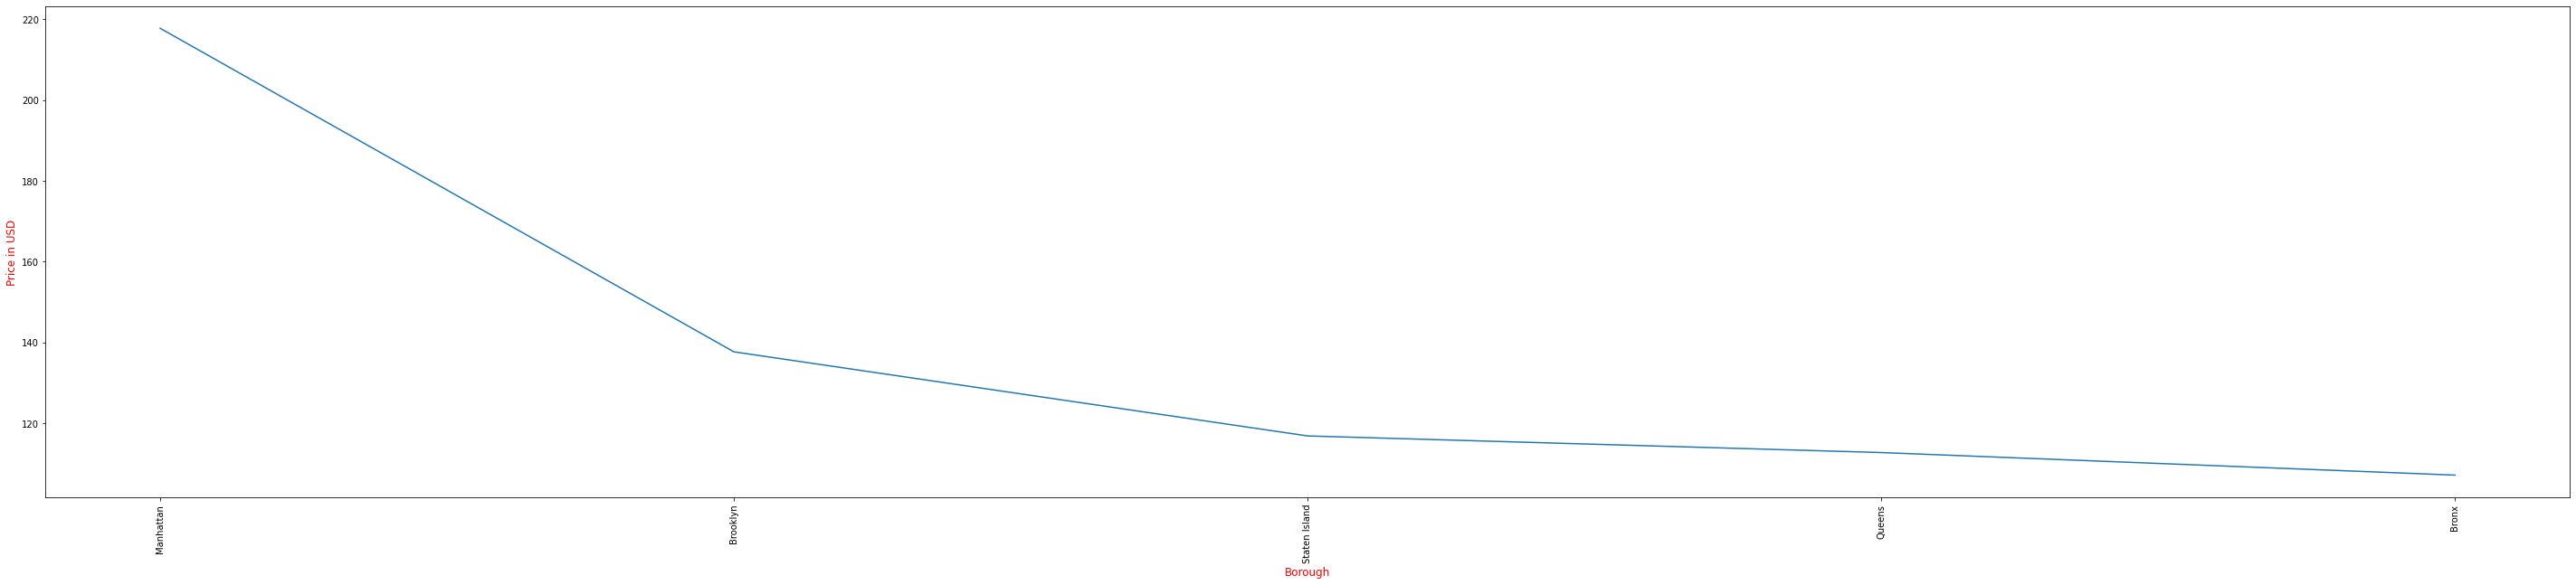

In [56]:
plotting_data(fig_size=(50,10),xticks_rotatation = 90,x_label ='Borough',y_label ="Price in USD",
              x = 'neighbourhood_group_cleansed',y='price',is_sorting = True,is_ascending = False)

As per the graph above, Manhattan is the priciest borough

In [57]:
#Jamaica Estates (Queens), Fort Wadsworth (Staten Island), and Riverdale
df[df['neighbourhood_cleansed']=='Jamaica Estates']['price']

3418       89.0
4503      175.0
8488      750.0
11480      90.0
14840     305.0
15678      72.0
17361     800.0
17853      45.0
19931     364.0
23961     120.0
25664     933.0
27422      45.0
31719     180.0
32401      60.0
32998      50.0
33099      45.0
33104      48.0
33135      45.0
33136      45.0
34037    5000.0
34136     140.0
34390    2000.0
36033    2000.0
36098    2000.0
36112    9999.0
37059     417.0
37148     289.0
37150     379.0
Name: price, dtype: float64

In [58]:
df[df['neighbourhood_cleansed']=='Jamaica Estates'][["price","property_type","room_type","accommodates"]]

,price,property_type,room_type,accommodates
3418,89.0,Entire residential home,Entire home/apt,4
4503,175.0,Entire residential home,Entire home/apt,8
8488,750.0,Private room in rental unit,Private room,1
11480,90.0,Private room in condominium (condo),Private room,2
14840,305.0,Private room,Private room,2
15678,72.0,Private room in residential home,Private room,1
17361,800.0,Entire residential home,Entire home/apt,2
17853,45.0,Private room in rental unit,Private room,1
19931,364.0,Entire residential home,Entire home/apt,16
23961,120.0,Entire rental unit,Entire home/apt,2


In [59]:
df[df['neighbourhood_cleansed']=='Fort Wadsworth'][["price","property_type","room_type","accommodates"]]

,price,property_type,room_type,accommodates
13467,800.0,Entire residential home,Entire home/apt,12


In [60]:
df[df['neighbourhood_cleansed']=='Riverdale'][["price","property_type","room_type","accommodates"]]

,price,property_type,room_type,accommodates
6155,65.0,Private room in condominium (condo),Private room,2
7212,85.0,Entire rental unit,Entire home/apt,2
10547,68.0,Private room in rental unit,Private room,4
21013,85.0,Entire rental unit,Entire home/apt,2
22080,163.0,Entire rental unit,Entire home/apt,4
27994,2000.0,Entire villa,Entire home/apt,12
33357,900.0,Entire villa,Entire home/apt,10
37326,250.0,Private room in condominium (condo),Private room,2


In [61]:
df[df['neighbourhood_cleansed']=='Cobble Hill'][["price","property_type","room_type","accommodates"]]

,price,property_type,room_type,accommodates
665,75.0,Private room in rental unit,Private room,1
811,145.0,Private room in townhouse,Private room,2
886,59.0,Private room in rental unit,Private room,1
1238,350.0,Entire rental unit,Entire home/apt,8
1320,165.0,Entire condominium (condo),Entire home/apt,2
...,...,...,...,...
29489,191.0,Entire rental unit,Entire home/apt,2
29935,500.0,Entire rental unit,Entire home/apt,8
30676,750.0,Entire residential home,Entire home/apt,7
35265,266.0,Entire rental unit,Entire home/apt,5


Comparing pricier's neighborhoods: Jamaica Estates, Fort Wadsworth, and Riverdale with less pricey neighbourhood Cobble Hill shows that a combination of accomondates(capacity) plays a part.
These neighbourhoods are close to the JFK and LGA airports (from personal knowledge) that make them pricier, but not indicated by any of the provided features

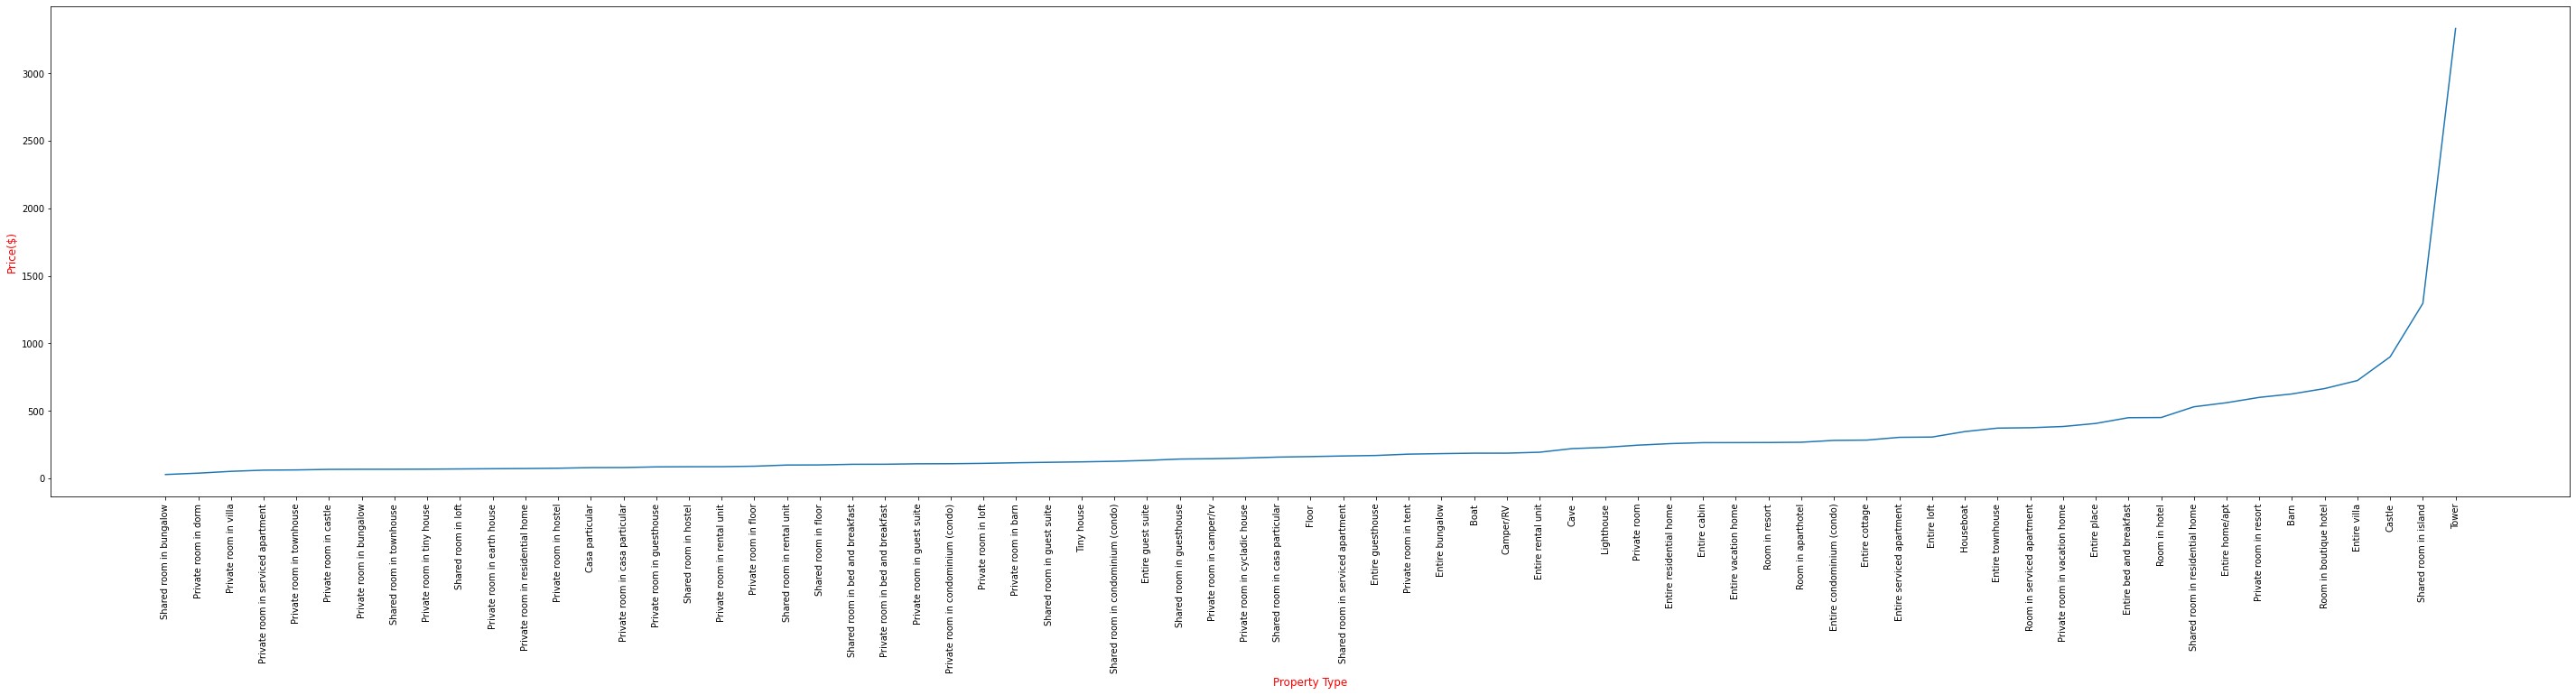

In [62]:
plotting_data(fig_size=(50,10),xticks_rotatation = 90,x_label ="Property Type",y_label ="Price($)",
              x = 'property_type',y='price',is_sorting = True,is_ascending = True)

As per the graph above, "Entire villa" and "shared room in residential home" are two of the pricier options for property_type that some of the top 3 neighbourhoods have more of.

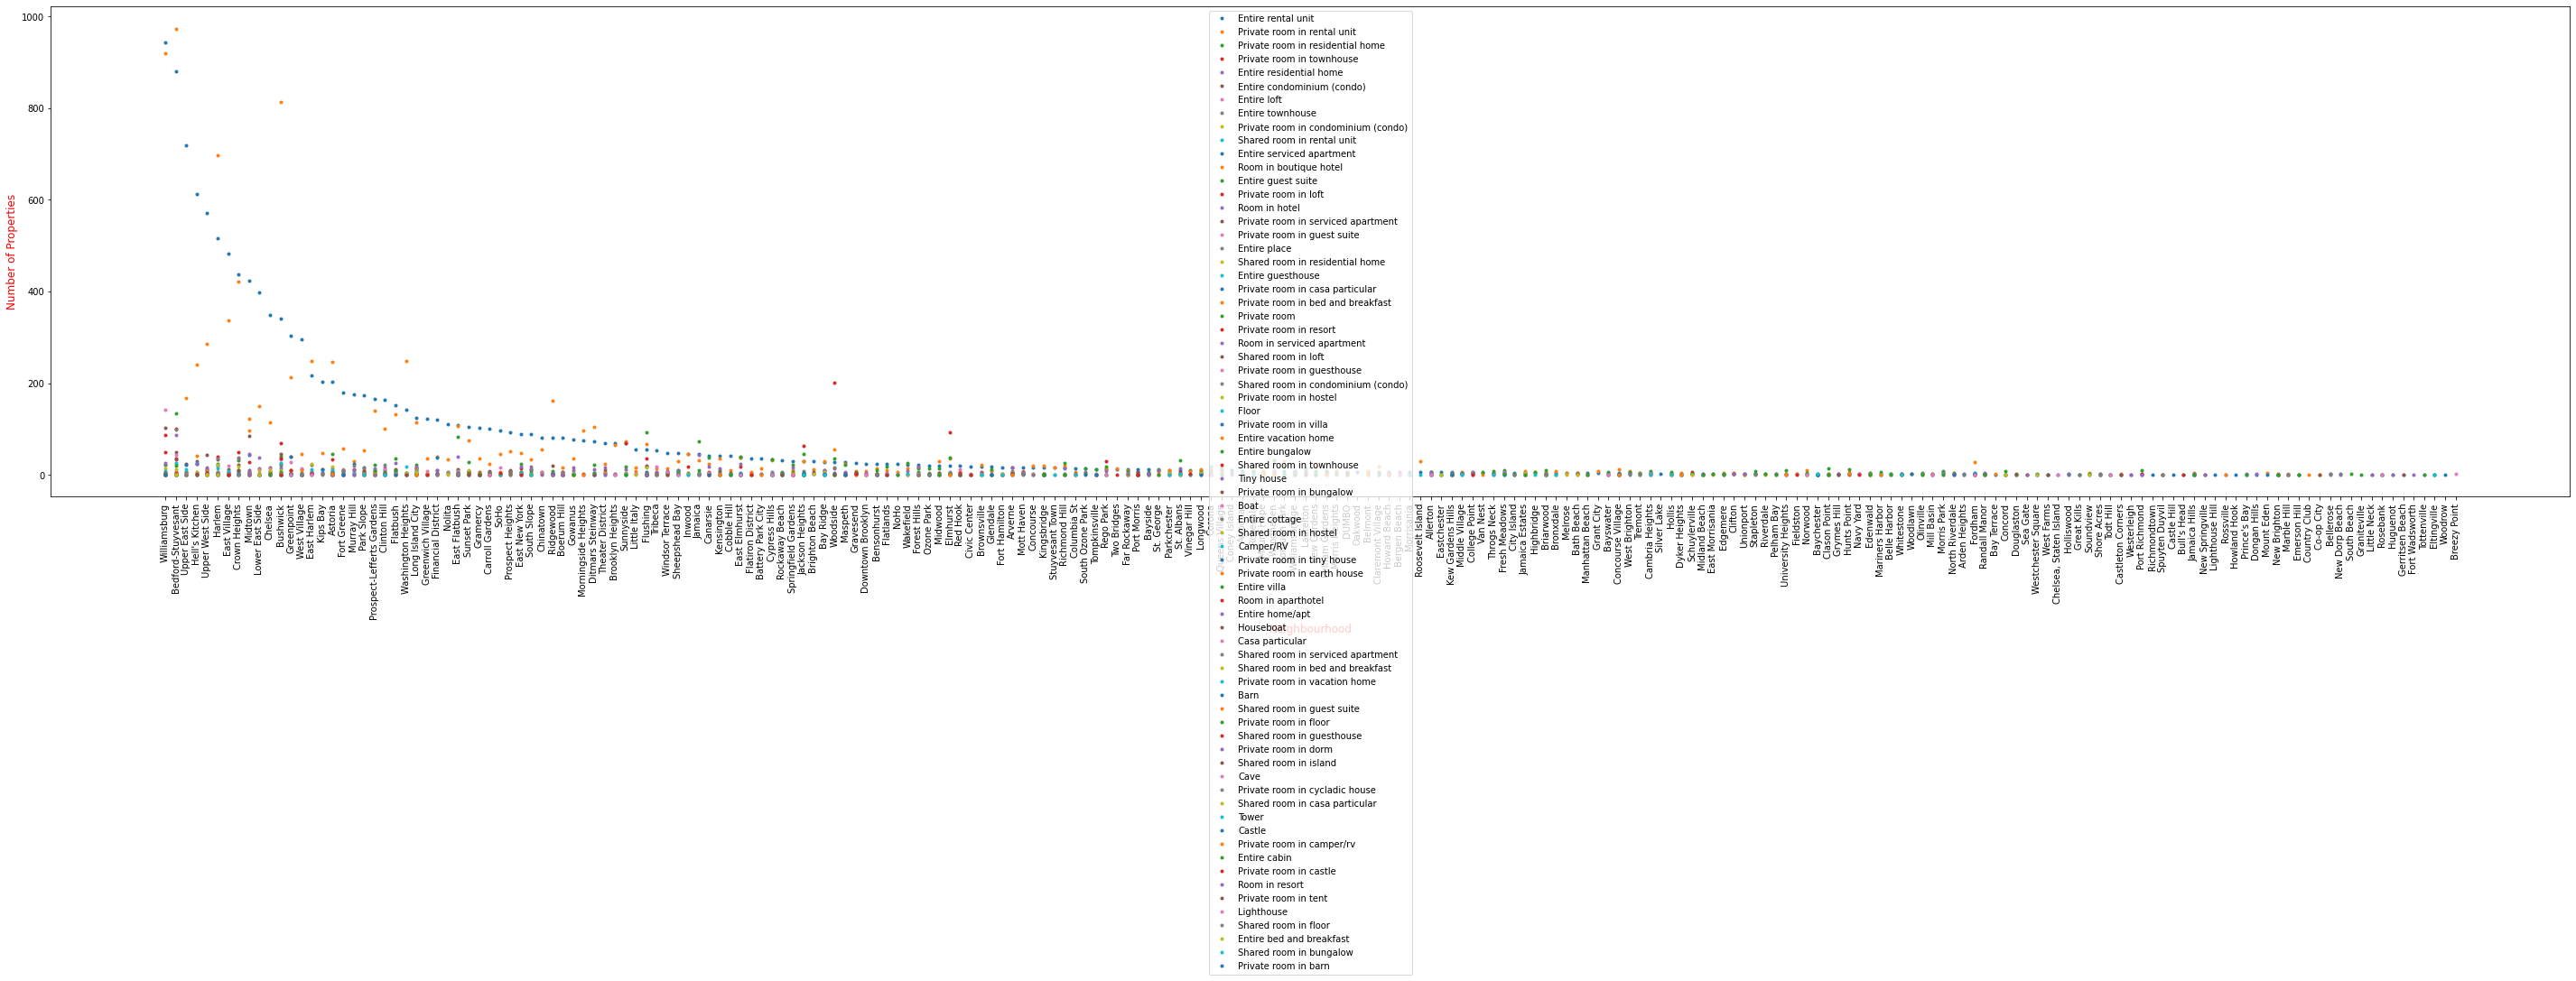

In [63]:
property_types = df['property_type'].value_counts().index
plt.subplots(figsize=(50,10))
plt.xticks(rotation=90)
plt.xlabel("Neighbourhood",size=12,color='r')
plt.ylabel("Number of Properties",size=12,color='r')
for property_type in property_types:
    plt.plot(df[df['property_type']==property_type]['neighbourhood_cleansed'].value_counts(),'.')
    plt.legend(labels = property_types,loc='upper center')


The graph above shows that "Private room in rental unit" comprises of the most number of airbnbs, but they don't bring in the most revenue

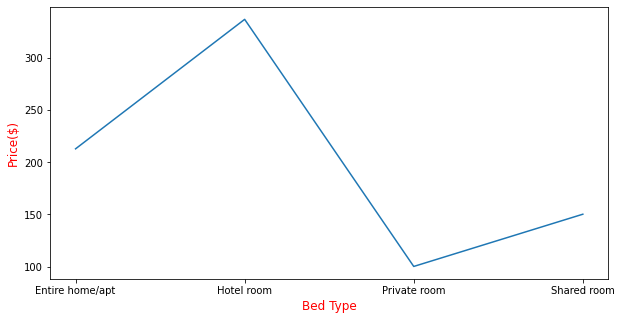

In [64]:
plotting_data(fig_size=(10,5),xticks_rotatation = 0,x_label ="Bed Type",y_label ="Price($)",
              x = 'room_type',y='price',is_sorting = False,is_ascending = True)

From the plot above, Hotel rooms are the priciest and the private rooms are the cheapest on average. Entire home/apt are mid-priced, which might be more affordable for an average Airbnb'r.

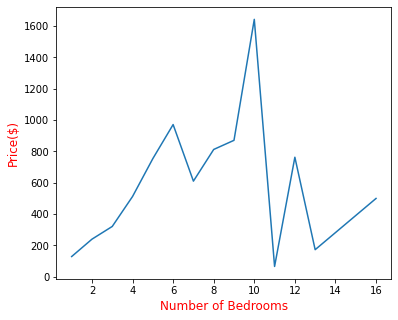

In [65]:
plotting_data(fig_size=(6,5),xticks_rotatation = 0,x_label ="Number of Bedrooms",y_label ="Price($)",
              x = 'bedrooms',y='price',is_sorting = False,is_ascending = True)

10 bedroom places seem to fetch the most amount of price.

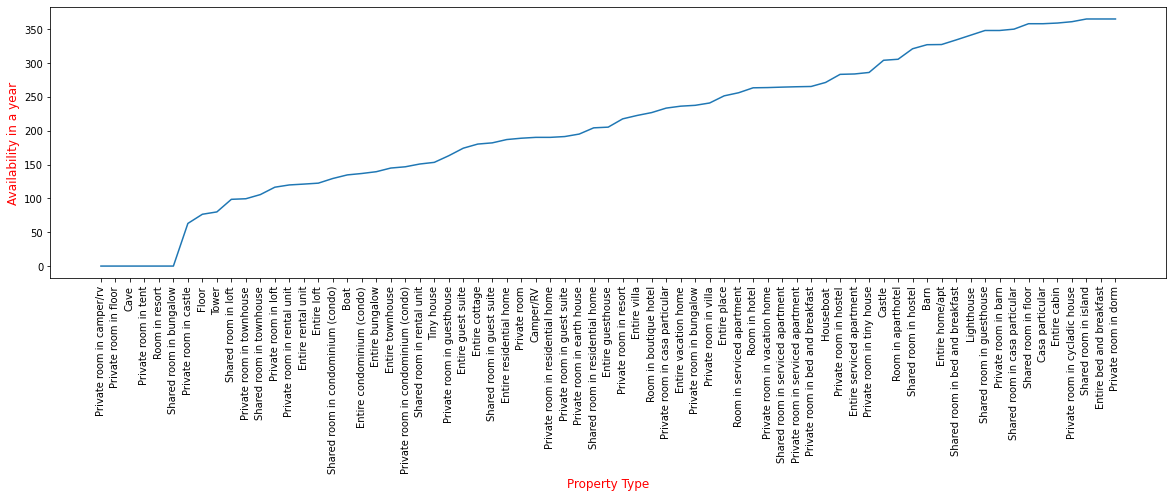

In [66]:
plotting_data(fig_size=(20,5),xticks_rotatation = 90,x_label ="Property Type",y_label ="Availability in a year",
              x = 'property_type',y='availability_365',is_sorting = True,is_ascending = True)

Regarding availability in a year, private rooms in camper/rv, floor, cave and tent have low availability because lack of corresponding resources needed to faciliate this demand.
But Entire villa has high availability and also was listed as one of the options that fetches more price.

Based on the above recommendations, a 10-bedroom Entire villa Airbnb in a neighborhood like Riverdale, Jamaica Estates, etc., close to the airport, will be a sound investment.

###Get better ratings

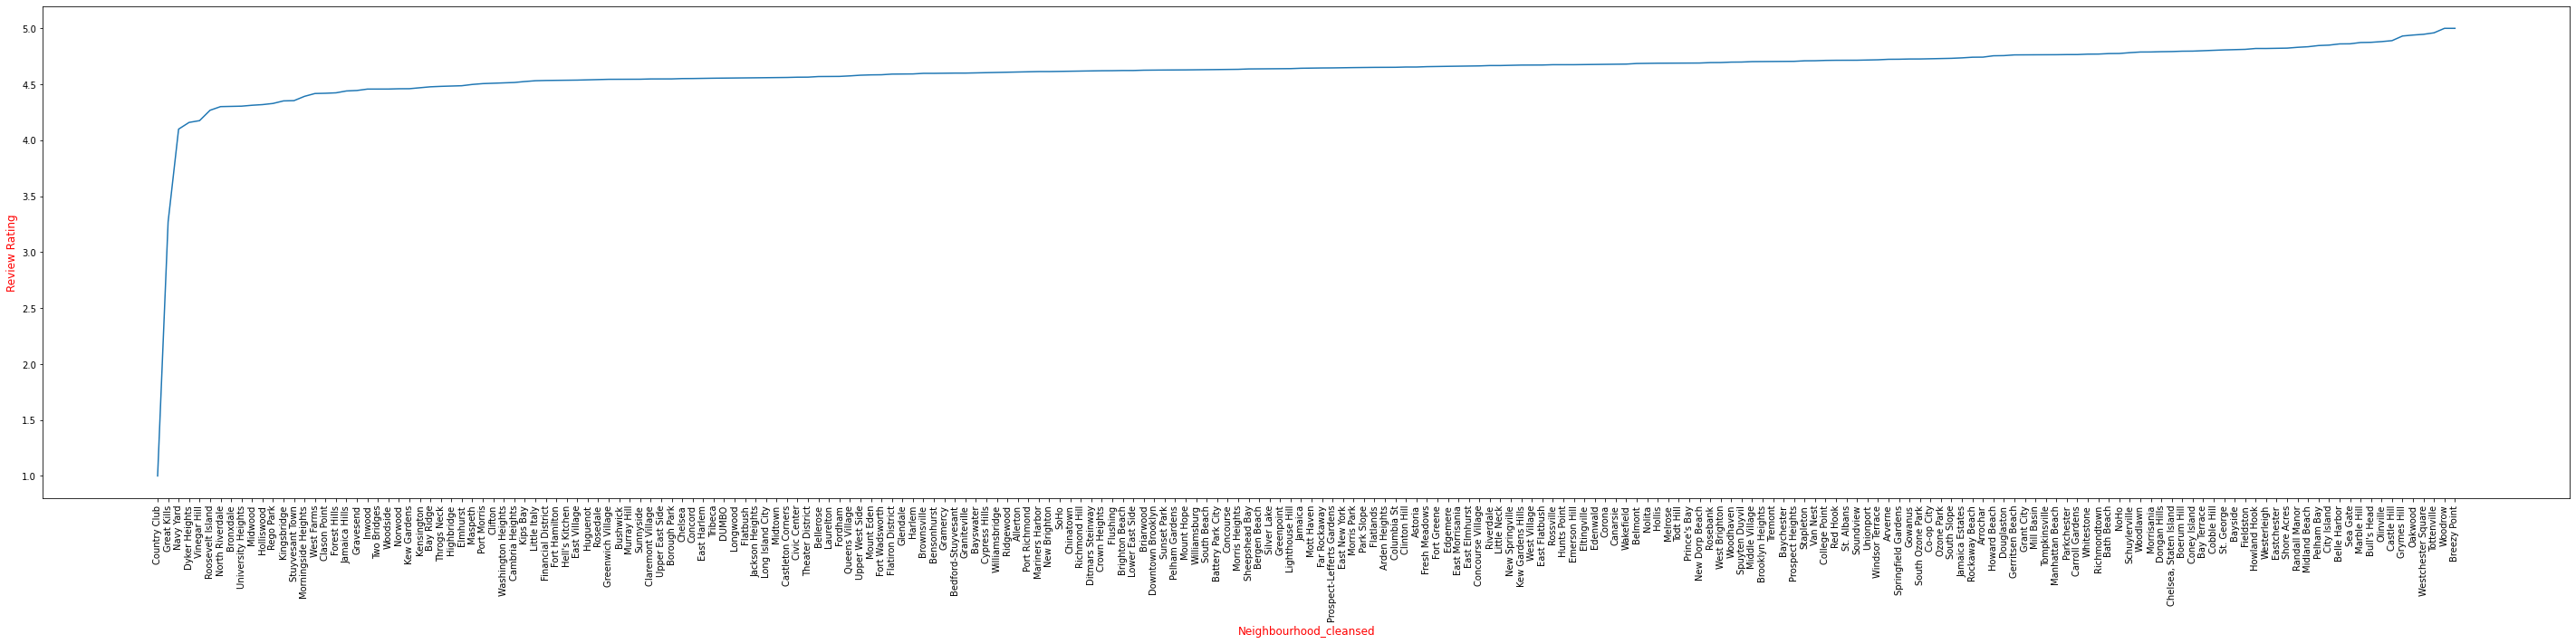

In [67]:
plotting_data(fig_size=(50,10),xticks_rotatation = 90,x_label ="Neighbourhood_cleansed",y_label ="Review Rating",
              x = 'neighbourhood_cleansed',y='review_scores_rating',is_sorting = True,is_ascending = True)

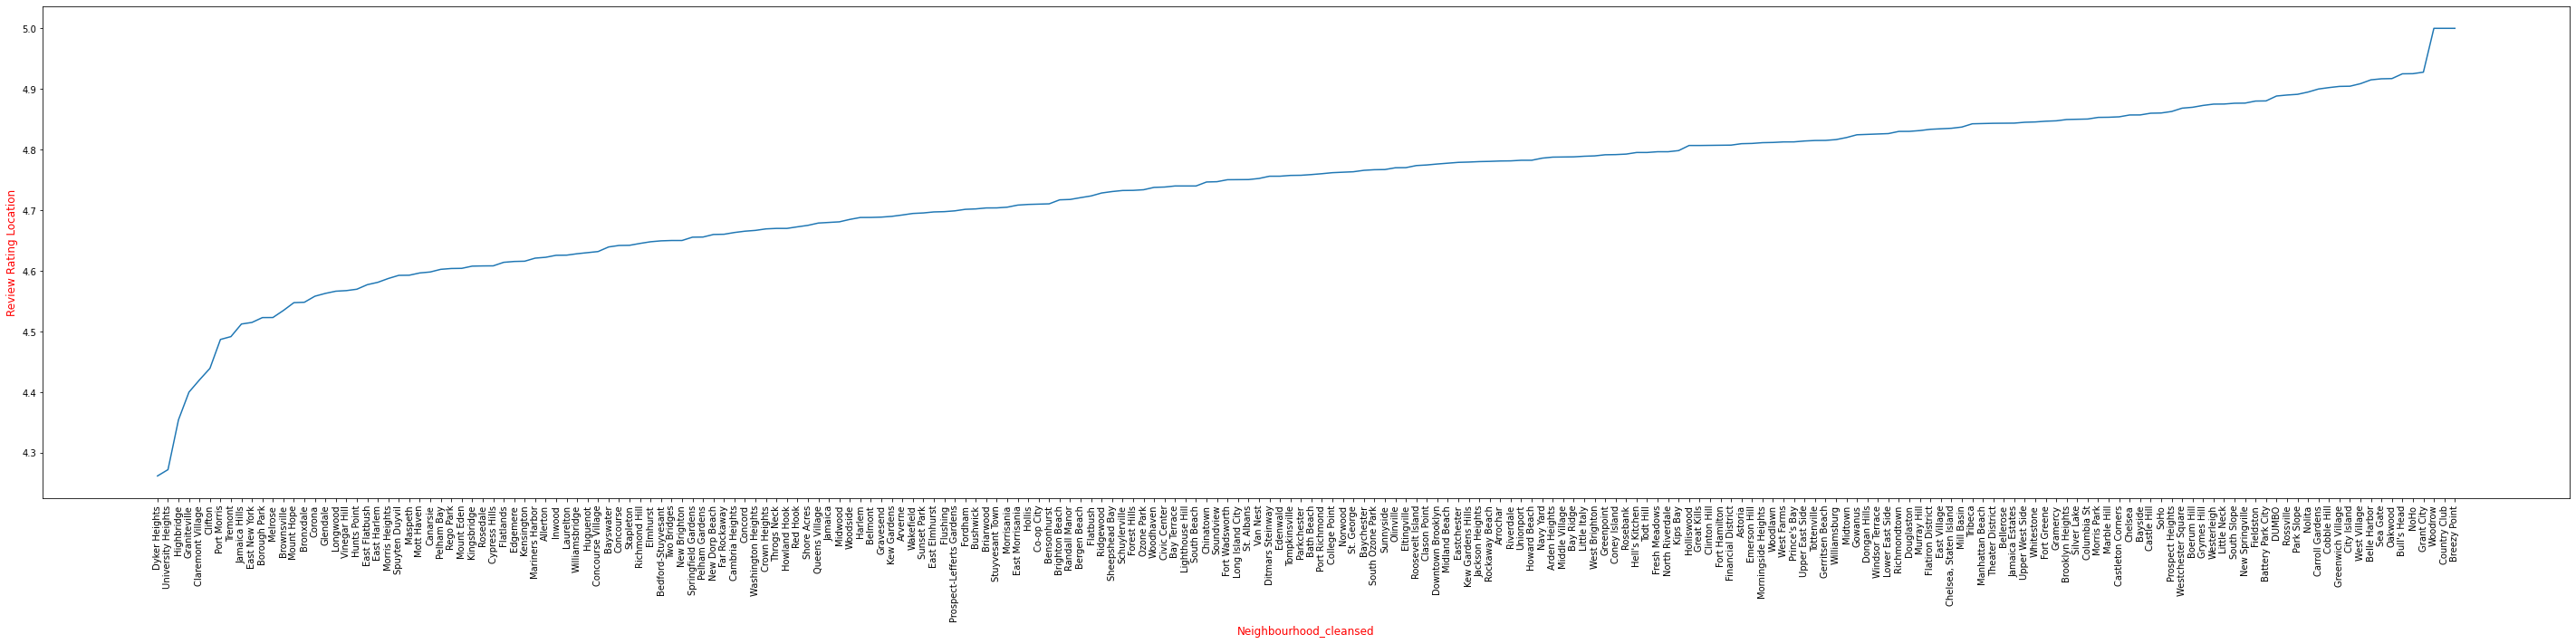

In [68]:
plotting_data(fig_size=(50,10),xticks_rotatation = 90,x_label ="Neighbourhood_cleansed",y_label ="Review Rating Location",
              x = 'neighbourhood_cleansed',y='review_scores_location',is_sorting = True,is_ascending = True)

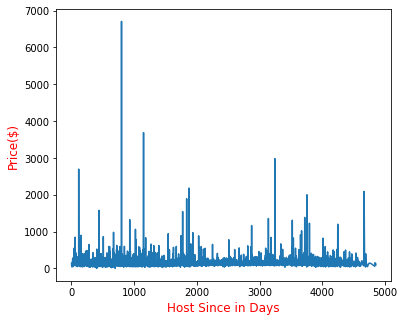

In [69]:
plotting_data(fig_size=(6,5),xticks_rotatation = 0,x_label ="Host Since in Days",y_label ="Price($)",
              x = 'host_since_days',y='price',is_sorting = False,is_ascending = True)

As per the graph above, there doesn't seem to be a correlation between being a host for longer and income generation by Airbnb.

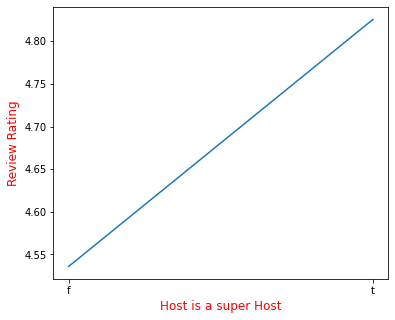

In [70]:
plotting_data(fig_size=(6,5),xticks_rotatation = 0,x_label ="Host is a super Host",y_label ="Review Rating",
              x = 'host_is_superhost',y='review_scores_rating',is_sorting = False,is_ascending = True)

Being a superhost seems directly proportional to higher rating

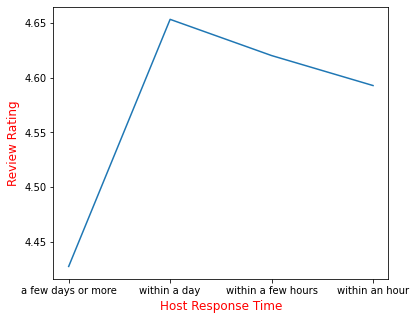

In [71]:
plotting_data(fig_size=(6,5),xticks_rotatation = 0,x_label ="Host Response Time",y_label ="Review Rating",
              x = 'host_response_time',y='review_scores_rating',is_sorting = False,is_ascending = True)

Responding within a day is optimal for rating, any later or sooner seems to lower the rating on average.

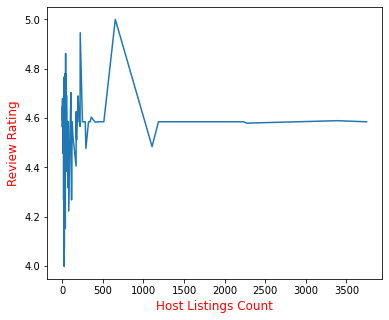

In [72]:
plotting_data(fig_size=(6,5),xticks_rotatation = 0,x_label ="Host Listings Count",y_label ="Review Rating",
              x = 'host_listings_count',y='review_scores_rating',is_sorting = False,is_ascending = True)

Host listing count between 600-800 seem to generate most rating but beyond approx 1300 posting count, review rating isn't affected.

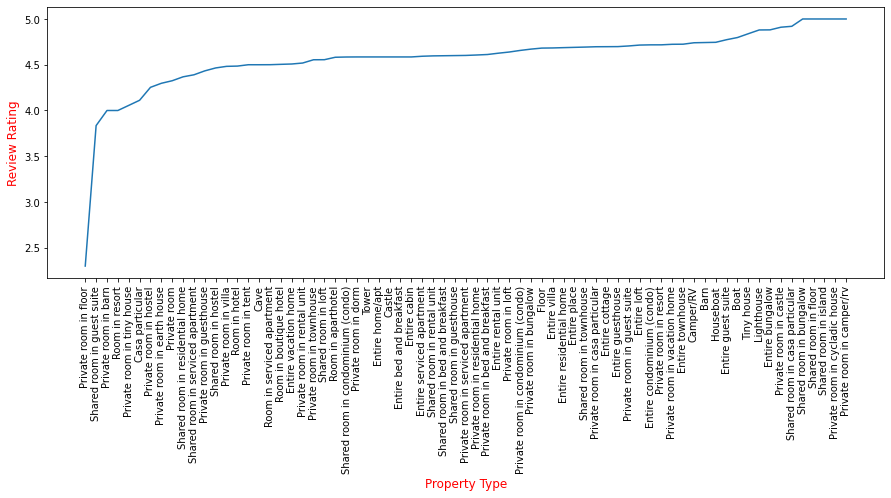

In [73]:
plotting_data(fig_size=(15,5),xticks_rotatation = 90,x_label ="Property Type",y_label ="Review Rating",
              x = 'property_type',y='review_scores_rating',is_sorting = True,is_ascending = True)

Most of the property types have close and comparable ratings, with exceptions being Private room in floor receiving abysmal ratings and Private rooms in cycladic house and in camper/rv receiving the highest ratings.

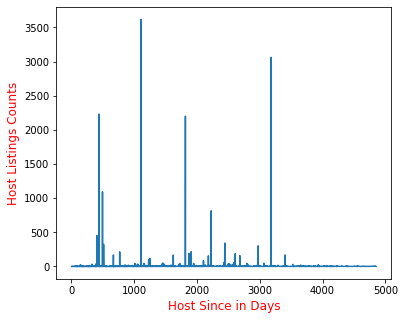

In [74]:
plotting_data(fig_size=(6,5),xticks_rotatation = 0,x_label ="Host Since in Days",y_label ="Host Listings Counts",
              x = 'host_since_days',y='host_listings_count',is_sorting = False,is_ascending = True)

More experienced hosts and most inexperienced hosts don't post too often. The former because they probably know how to post optimally and latter because they are trying to figure things out.

###Demand in NYC for Airbnb properties

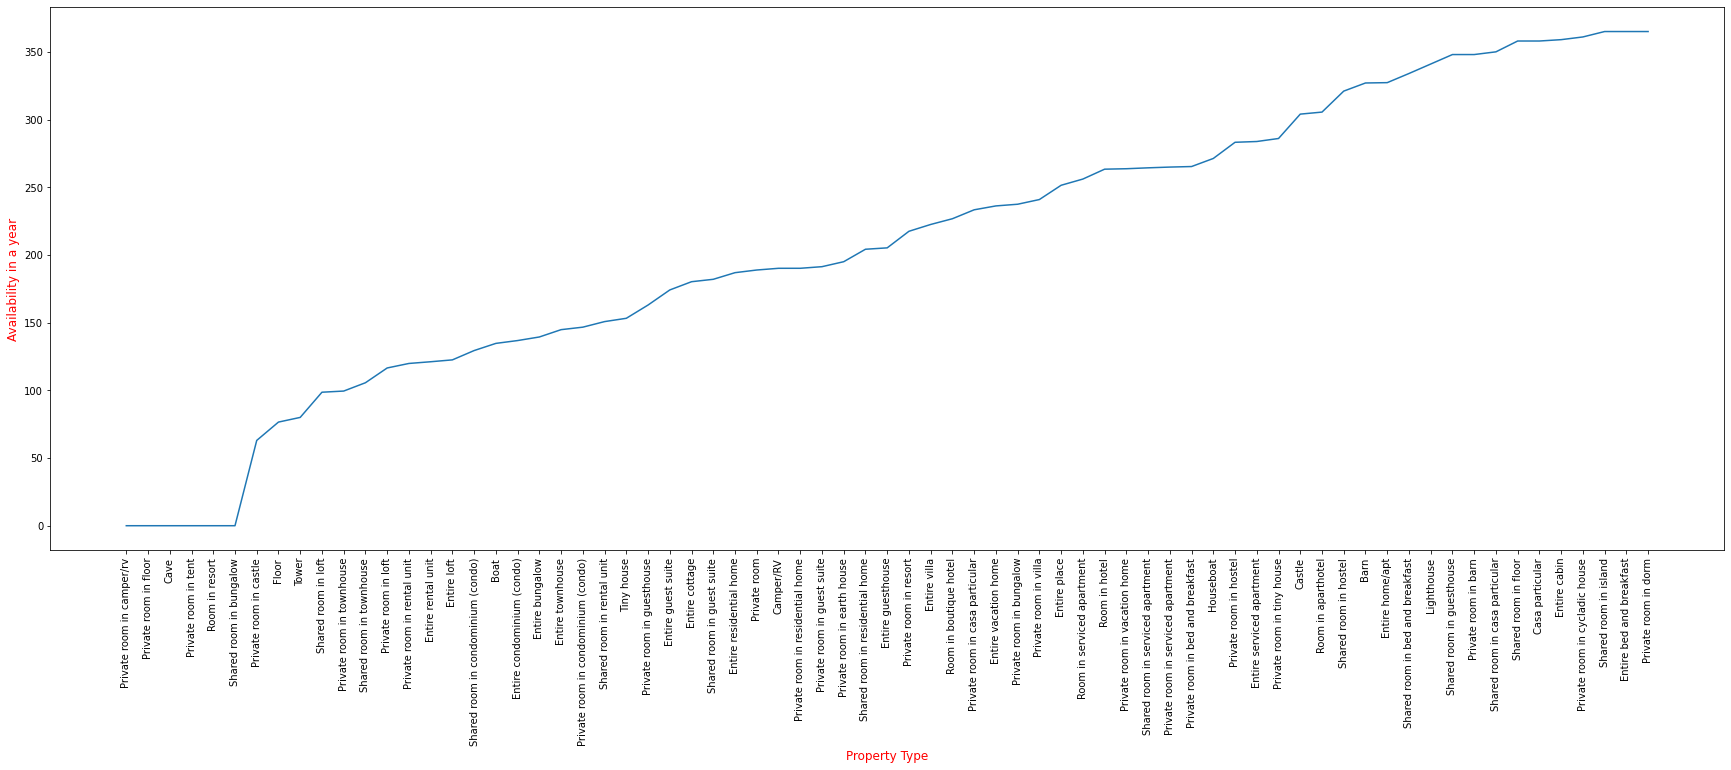

In [75]:
plotting_data(fig_size=(30,10),xticks_rotatation = 90,x_label ="Property Type",y_label ="Availability in a year",
              x = 'property_type',y='availability_365',is_sorting = True,is_ascending = True)

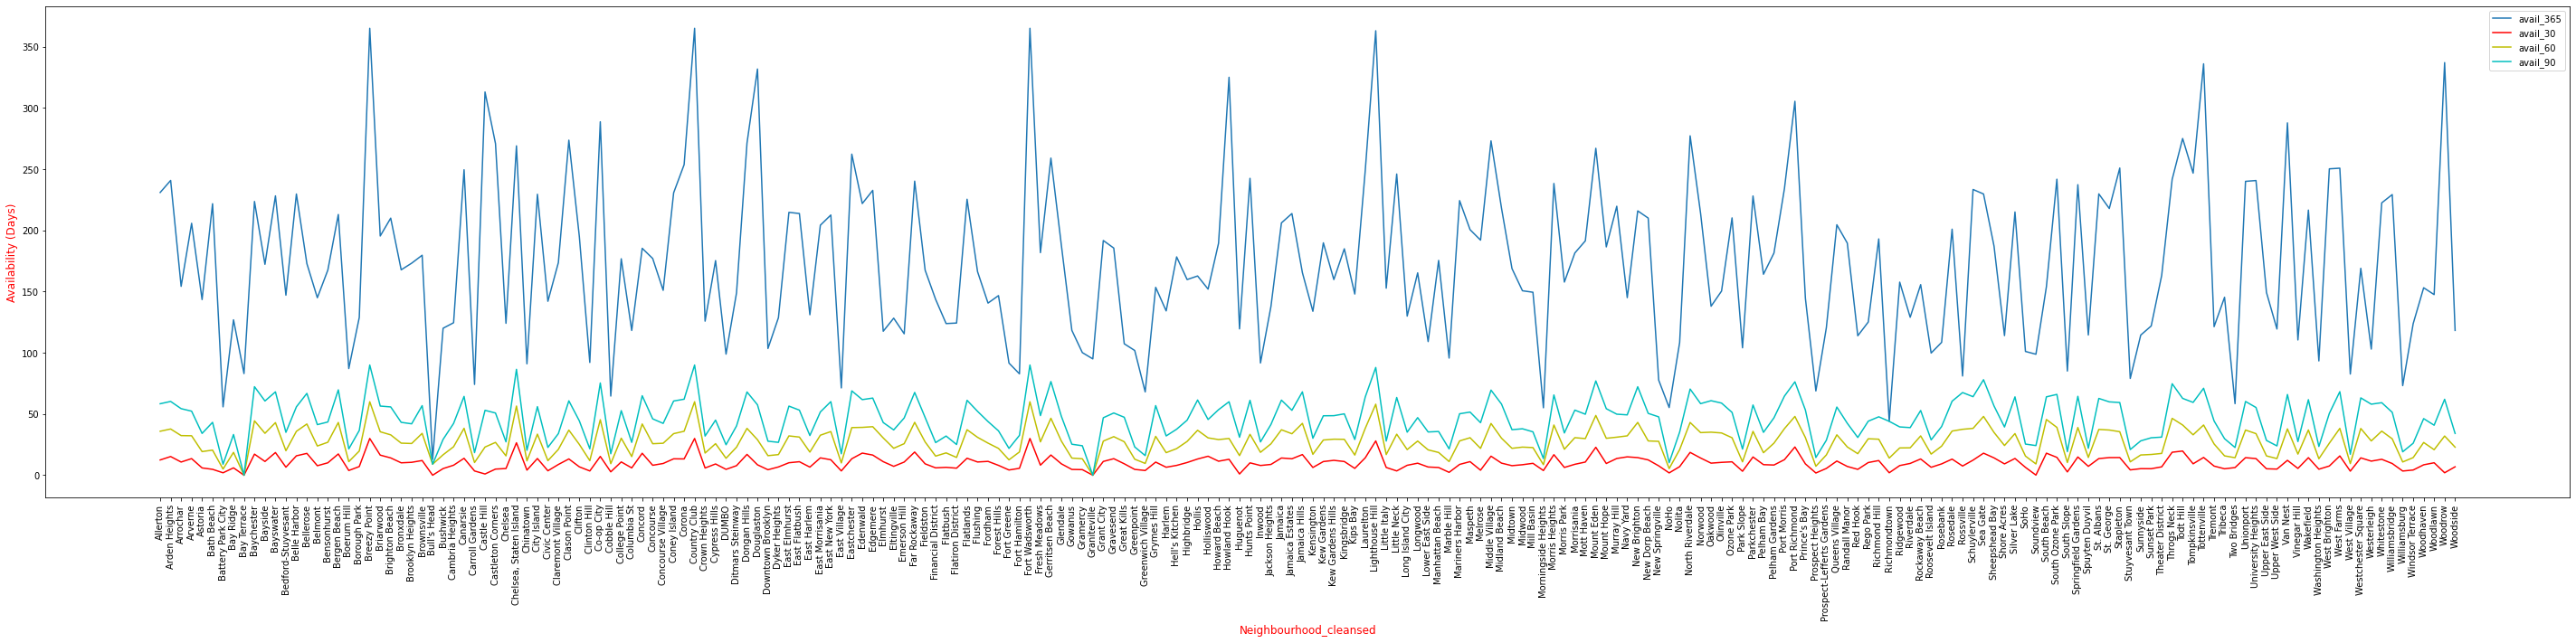

In [76]:
plt.figure(figsize=(50,10))
plt.xticks(rotation=90)
plt.xlabel("Neighbourhood_cleansed",size=12,color='r')
plt.ylabel("Availability (Days)",size=12,color='r')
avail_365 = plt.plot(df.groupby('neighbourhood_cleansed').mean()['availability_365'])
avail_30 =plt.plot(df.groupby('neighbourhood_cleansed').mean()['availability_30'],'-r')
avail_60 =plt.plot(df.groupby('neighbourhood_cleansed').mean()['availability_60'],'-y')
avail_90 =plt.plot(df.groupby('neighbourhood_cleansed').mean()['availability_90'],'-c')
plt.legend(['avail_365','avail_30','avail_60','avail_90'])
plt.show()

Availability in 30,60,and 90 days is pretty similar.
Availability over a year is also mirroring the above patterns except for a few towns like Richmondtown and Rossville where the yearly metric diminshes indicating seasonality.

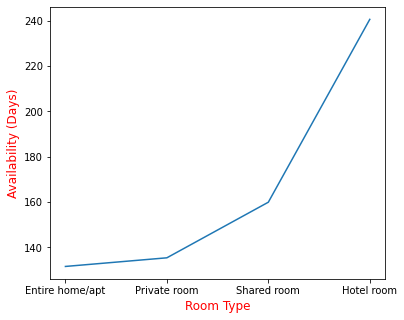

In [77]:
plotting_data(fig_size=(6,5),xticks_rotatation = 0,x_label ="Room Type",y_label ="Availability (Days)",
              x = 'room_type',y='availability_365',is_sorting = True,is_ascending = True)

Hotel rooms are available more often than people's homes/apartments

##Modelling feature prep

In [78]:
df.head()

,last_scraped,host_since,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_listings_count,host_verifications,host_identity_verified,...,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,host_since_days,time_to_first_review,time_from_last_review
0,2021-12-05,2008-09-09,within a day,80%,17%,f,Midtown,8.0,"['email', 'phone', 'reviews', 'offline_governm...",t,...,4.86,4.41,f,3,0,0,0.33,4835.0,4397.0,762.0
2,2021-12-05,2009-02-03,within an hour,100%,100%,f,Bedford-Stuyvesant,1.0,"['email', 'phone', 'facebook', 'reviews', 'off...",t,...,4.47,4.52,f,0,2,0,0.52,4688.0,2874.0,2009.0
3,2021-12-05,2009-02-03,within a day,100%,25%,f,Greenwood Heights,1.0,"['email', 'phone', 'reviews']",t,...,4.50,5.00,f,1,0,0,0.02,4688.0,2894.0,119.0
4,2021-12-05,2009-03-03,within a day,100%,100%,f,Hell's Kitchen,1.0,"['email', 'phone', 'facebook', 'reviews']",f,...,4.87,4.36,f,0,1,0,3.68,4660.0,4127.0,27.0
5,2021-12-05,2009-02-05,within an hour,100%,100%,f,Upper West Side,1.0,"['email', 'phone', 'facebook', 'google', 'revi...",t,...,4.94,4.92,f,0,1,0,0.87,4686.0,4075.0,1607.0


In [79]:
df.columns

Index(['last_scraped', 'host_since', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_listings_count', 'host_verifications',
       'host_identity_verified', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'property_type', 'room_type',
       'accommodates', 'bathrooms_text', 'bedrooms', 'beds', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'first_review', 'last_review', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communic

In [80]:
drop=['last_scraped','host_since','amenities','host_response_rate']
df.drop(columns=drop, inplace=True,axis=1)

In [81]:
df.drop(columns=['host_neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','first_review','last_review'],axis=1,inplace=True)

In [82]:
cat_cols=[]
for col in df.dtypes.index:
    if df.dtypes[col] == 'O':cat_cols.append(col)

In [83]:
cat_cols

['host_response_time',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_verifications',
 'host_identity_verified',
 'property_type',
 'room_type',
 'bathrooms_text',
 'has_availability',
 'instant_bookable']

In [84]:
df_dummies = pd.get_dummies(df[cat_cols],drop_first=True)

In [86]:
df_dummies.head()

,host_response_time_within a day,host_response_time_within a few hours,host_response_time_within an hour,host_acceptance_rate_1%,host_acceptance_rate_10%,host_acceptance_rate_100%,host_acceptance_rate_11%,host_acceptance_rate_12%,host_acceptance_rate_13%,host_acceptance_rate_14%,...,bathrooms_text_5.5 baths,bathrooms_text_6 baths,bathrooms_text_6.5 baths,bathrooms_text_7.5 baths,bathrooms_text_8 baths,bathrooms_text_Half-bath,bathrooms_text_Private half-bath,bathrooms_text_Shared half-bath,has_availability_t,instant_bookable_t
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
5,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [87]:
final_df = pd.concat([df.drop(columns=cat_cols,axis=1),df_dummies],axis=1)

In [89]:
final_df.head()

,host_listings_count,accommodates,bedrooms,beds,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,...,bathrooms_text_5.5 baths,bathrooms_text_6 baths,bathrooms_text_6.5 baths,bathrooms_text_7.5 baths,bathrooms_text_8 baths,bathrooms_text_Half-bath,bathrooms_text_Private half-bath,bathrooms_text_Shared half-bath,has_availability_t,instant_bookable_t
0,8.0,1,1.0,1.0,150.0,30,1125,30.0,30.0,1125.0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,2,1.0,1.0,60.0,30,730,30.0,30.0,730.0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,4,2.0,2.0,275.0,5,1125,5.0,5.0,1125.0,...,0,0,0,0,0,0,0,0,1,0
4,1.0,2,1.0,1.0,68.0,2,14,2.0,2.0,14.0,...,0,0,0,0,0,0,0,0,1,0
5,1.0,1,1.0,1.0,75.0,2,14,2.0,2.0,14.0,...,0,0,0,0,0,0,0,0,1,0


###Modeling

In [93]:
y = final_df['price']
X = final_df.drop(columns=['price'], axis=1)

In [94]:
X.head()

,host_listings_count,accommodates,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,...,bathrooms_text_5.5 baths,bathrooms_text_6 baths,bathrooms_text_6.5 baths,bathrooms_text_7.5 baths,bathrooms_text_8 baths,bathrooms_text_Half-bath,bathrooms_text_Private half-bath,bathrooms_text_Shared half-bath,has_availability_t,instant_bookable_t
0,8.0,1,1.0,1.0,30,1125,30.0,30.0,1125.0,1125.0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,2,1.0,1.0,30,730,30.0,30.0,730.0,730.0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,4,2.0,2.0,5,1125,5.0,5.0,1125.0,1125.0,...,0,0,0,0,0,0,0,0,1,0
4,1.0,2,1.0,1.0,2,14,2.0,2.0,14.0,14.0,...,0,0,0,0,0,0,0,0,1,0
5,1.0,1,1.0,1.0,2,14,2.0,2.0,14.0,14.0,...,0,0,0,0,0,0,0,0,1,0


In [95]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)
print(model.feature_importances_)

[2.62827901e-02 7.42245579e-02 2.70896194e-02 1.17062463e-02
 9.43433749e-03 6.21652357e-02 3.01610811e-02 1.13313990e-02
 8.05029194e-03 1.14441040e-02 1.60029878e-02 7.77671598e-03
 1.69938009e-02 1.25515753e-02 1.25013139e-02 1.23354178e-02
 1.76921042e-02 2.79467823e-03 1.13762906e-03 1.02022769e-02
 9.34139036e-03 1.50268875e-02 1.18807511e-02 5.63172920e-03
 2.14625180e-02 7.65952191e-03 4.13939141e-03 6.74806506e-03
 1.76190960e-03 1.38897029e-02 2.48064156e-02 2.23180348e-02
 2.74659961e-02 1.43397694e-03 2.12874916e-03 3.10100771e-02
 6.07449189e-06 8.91285074e-05 4.44195840e-03 3.33955405e-05
 1.37740554e-04 2.78941471e-05 1.26607331e-05 1.93634211e-06
 7.20983411e-09 1.88634255e-04 3.69206727e-06 4.93178350e-06
 1.93974704e-06 7.48648015e-05 5.60448772e-05 3.32582337e-05
 3.17597554e-05 1.35240581e-05 3.34753469e-04 6.33012220e-06
 9.06798047e-05 4.81319478e-05 2.65301820e-04 1.00873248e-04
 1.12520973e-05 5.64932875e-03 1.46240038e-05 8.04916111e-04
 1.00529456e-05 2.696525

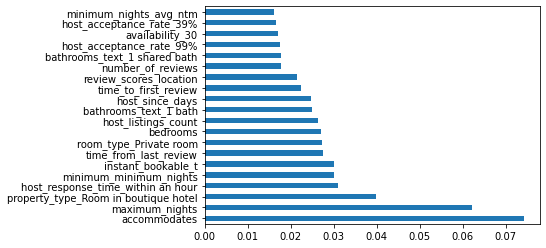

In [96]:
feat_importances=pd.Series(model.feature_importances_,index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

In [97]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [98]:
from sklearn.ensemble import RandomForestRegressor
rf_random=RandomForestRegressor()
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [100]:
from sklearn.model_selection import RandomizedSearchCV
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 100]

min_samples_leaf = [1, 2, 5, 10]

In [102]:
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [105]:
rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='r2', n_iter = 3, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [106]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  21.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  21.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  30.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  22.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  21.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  40.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  40.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=3, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='r2', verbose=2)

In [107]:
rf_random.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 1100}

In [108]:
rf_random.best_score_

0.2374284516645611

In [110]:
most_important_feat = feat_importances.sort_values(ascending=False).index[:19]

In [111]:
X=final_df[most_important_feat]

In [112]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [113]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='r2', n_iter = 3, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [114]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  15.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=  16.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  25.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  25.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=3, n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='r2', verbose=2)

Evaluate the model

In [115]:
rf_random.best_score_

0.27717632949357934

In [116]:
rf_random.best_params_

{'max_depth': 15,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 1100}

Now we will predict using our model to determine the R2 score for test data set and train data set.

In [117]:
y_pred= rf_random.predict(X_test)

In [118]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.32176392612830085

In [119]:
y_pred_train=rf_random.predict(X_train)

In [120]:
r2_score(y_train,y_pred_train)

0.5539025811308431